# Part I - Ford GoBike EDA
## by Ahmed Muhumed

## Introduction
> Ford, in collaboration with Motivate - the global leader in bike-share technology, has launched Ford GoBike – a regional bike-share network designed to enhance sustainable transportation in the San Francisco Bay Area. Designed for the hilly urban environment of San Francisco, Ford GoBikes are built to be comfortable and easy to ride. Ford GoBike is the Bay Area's bike share connecting you to work, friends and your favorite restaurant. Thousands of bikes to pick up and drop off anywhere. No schedule. No rails. Ride your way. Available in San Francisco, San Jose, and the East Bay 24/7.






## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# loading my dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [4]:
# overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# let's check the descriptive statistics for numeric variables
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
#the list of columns in the dataset
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [7]:
#the number of duplicates in the entire dataframe
df.duplicated().sum()

0

In [8]:
#the number of null values in the entire dataframe
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
#let us drop all the null-values, otherwise it will affect the exploration of the data.
df = df.dropna()

In [10]:
#the number of subscribers and the number of customers in the dataset.
df.user_type.value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [11]:
#number of unique start stations
df.start_station_name.nunique()

329

In [12]:
#number of unique end stations
df.end_station_name.nunique()

329

In [13]:
#number of unique gender
df.member_gender.nunique()

3

In [14]:
#let us convert the start time and end time data type into datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [15]:
#testing the data type of end time and start time
df['end_time'].dtype, df['start_time'].dtype

(dtype('<M8[ns]'), dtype('<M8[ns]'))

In [16]:
#the data type of start_station_id, end_station_id and member-birth year are all supposed to be integer, not a float.
pd.options.mode.chained_assignment = None  # default='warn'
df[['start_station_id','end_station_id','member_birth_year']]=df[['start_station_id','end_station_id','member_birth_year']].apply(np.int64)

In [17]:
df['start_station_id'].dtype, df['end_station_id'].dtype, df['member_birth_year'].dtype

(dtype('int64'), dtype('int64'), dtype('int64'))

In [18]:
(df.member_gender == 'Female').sum()

40805

In [19]:
(df.member_gender == 'Male').sum()

130500

In [20]:
(df.member_gender == 'Other').sum()

3647

In [21]:
df.start_station_name.value_counts()

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
                                                             ... 
Farnam St at Fruitvale Ave                                      9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [22]:
df.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
110767,1223,2019-02-12 17:29:54.038,2019-02-12 17:50:17.529,170,Telegraph Ave at 58th St,37.844493,-122.261351,252,Channing Way at Shattuck Ave,37.865847,-122.267443,299,Customer,1988,Female,No
181918,1854,2019-02-01 08:22:29.268,2019-02-01 08:53:23.690,197,El Embarcadero at Grand Ave,37.808848,-122.249680,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,4922,Subscriber,1972,Male,No
114769,795,2019-02-12 09:08:02.870,2019-02-12 09:21:17.888,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,363,Salesforce Transit Center (Natoma St at 2nd St),37.787492,-122.398285,5130,Subscriber,1994,Male,No
89476,1360,2019-02-16 15:10:24.493,2019-02-16 15:33:05.060,133,Valencia St at 22nd St,37.755213,-122.420975,47,4th St at Harrison St,37.780955,-122.399749,4611,Customer,1991,Male,No
54006,161,2019-02-21 14:11:13.593,2019-02-21 14:13:55.053,95,Sanchez St at 15th St,37.766219,-122.431060,106,Sanchez St at 17th St,37.763242,-122.430675,6501,Subscriber,1931,Male,No
33290,344,2019-02-24 12:17:09.207,2019-02-24 12:22:54.172,270,Ninth St at Heinz Ave,37.853489,-122.289415,263,Channing Way at San Pablo Ave,37.862827,-122.290231,3750,Subscriber,1989,Female,No
159022,252,2019-02-05 18:27:19.502,2019-02-05 18:31:32.111,313,Almaden Blvd at San Fernando St,37.331415,-121.893200,312,San Jose Diridon Station,37.329732,-121.901782,24,Subscriber,1990,Male,No
101709,443,2019-02-14 17:18:32.745,2019-02-14 17:25:56.449,280,San Fernando St at 7th St,37.337122,-121.883215,294,Pierce Ave at Market St,37.327581,-121.884559,3824,Subscriber,1985,Male,No
102746,730,2019-02-14 15:50:44.157,2019-02-14 16:02:54.505,80,Townsend St at 5th St,37.775235,-122.397437,129,Harrison St at 20th St,37.758862,-122.412544,5463,Customer,1987,Male,No
135770,152,2019-02-08 11:55:16.109,2019-02-08 11:57:48.257,90,Townsend St at 7th St,37.771058,-122.402717,80,Townsend St at 5th St,37.775235,-122.397437,3624,Subscriber,1986,Male,No


>**Before answering the following questions, let us make a quick overview of what I did in the preliminary wrangling**
      
      1. I have dropped all the null values for the sake of convenience EDA, and this makes the number of entries from 
         183412 to 174952
      2. I have changed the data type of these columns; start_time, end_time, start_station_id, end_station_id,   
         member_birth_year into their appropriate data type.

### What is the structure of your dataset?

> This dataset contains 174952 entries and a total of 16 columns. In other words, we have 16 features in this dataset:
         
         1. duration of the trip in seconds
         2. start time and end time
         3. id, name and the coordinates of the start station
         5. id, name and the coordinates of the end station
         6. bike id
         7. user type (Customer or Subscriber)
         8. birth year of the member
         9. member gender (Female, Male or Other) 
         10. bike_share_for_all_trip - if it is round trip or not      
> Most of the variables are numeric (int and float), and there are object variables.

### What is/are the main feature(s) of interest in your dataset?

> Duration of the trips, Bike ID, the different user types in the dataset, the age of the members and their gender (Male, Femal or other) and the kind of the trip (one way trip or round), these are the variables of interest in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The descriptive statistics, the frequency of specific variables are those features that can help my investigation.

## Univariate Exploration

In [23]:
#this function plots bar charts by taking multiple arguments at one time
def barcharts(data, title: str, xlabel: str="", ylabel: str=""):
    plt.figure(figsize = [15, 8])
    data.plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

#### 1. How is the descriptive statistics of the duration insight?

In [24]:
#this code statistically describes the duration of the trip
described_df = df['duration_sec'].describe().loc[['mean','std','min','25%','50%','75%','max']]

#this code displays the described data and its logarithmic scale
described_df, np.log10(described_df)

(mean      704.002744
 std      1642.204905
 min        61.000000
 25%       323.000000
 50%       510.000000
 75%       789.000000
 max     84548.000000
 Name: duration_sec, dtype: float64,
 mean    2.847574
 std     3.215427
 min     1.785330
 25%     2.509203
 50%     2.707570
 75%     2.897077
 max     4.927103
 Name: duration_sec, dtype: float64)

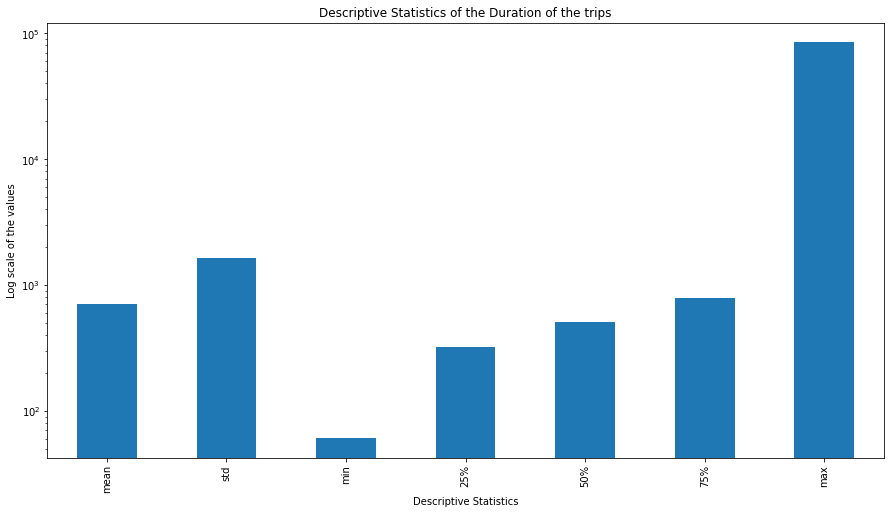

In [25]:
barcharts(described_df, "Descriptive Statistics of the Duration of the trips", "Descriptive Statistics", "Log scale of the values")
plt.yscale('log')

>**Observation:** From the above chart, it clearly indicates the descriptive statistics of the duration column in our dataset. We have the minimum trip duration, maximum trip duration, mean, standard deviation, first, second and third quartiles. The mean is approximately 2.84 which is a log scale, and if we use logx = 2.84, we can get the mean which is approximately 700 seconds. So, 700/60 is equal to 11.7 minutes. This means that the average trip duration is 11.7 minutes. 

#### 2. How the user types are distributed?

In [26]:
df['user_type'].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [27]:
#this function plots seaborn's countplot by taking multiple arguments at one time
def seaborn_countplot(datadf, xaxis, the_title: str, xlabel: str="", ylabel: str=""):
    plt.figure(figsize = [12, 8])
    color = sb.color_palette()[3]
    sb.countplot(data=datadf, x=xaxis, color = color, order = order)
    plt.title(the_title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

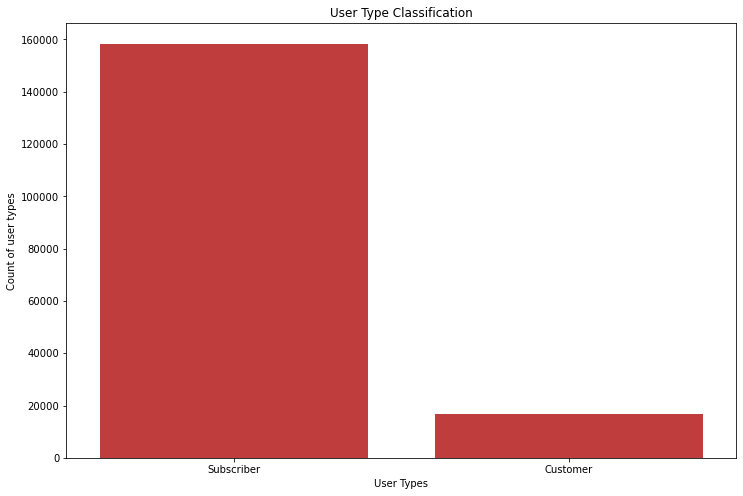

In [28]:
#this code plots the count of different user types in the trips
order = df.user_type.value_counts().index
seaborn_countplot(df, df.user_type, "User Type Classification", "User Types", "Count of user types")

>**Observation:** From the above chart, we have see how user types are distributed, we have a large of number of subscriber combared to the number of customers as shown in the chart. 

#### 3. How is the gender distribution of the bike users?

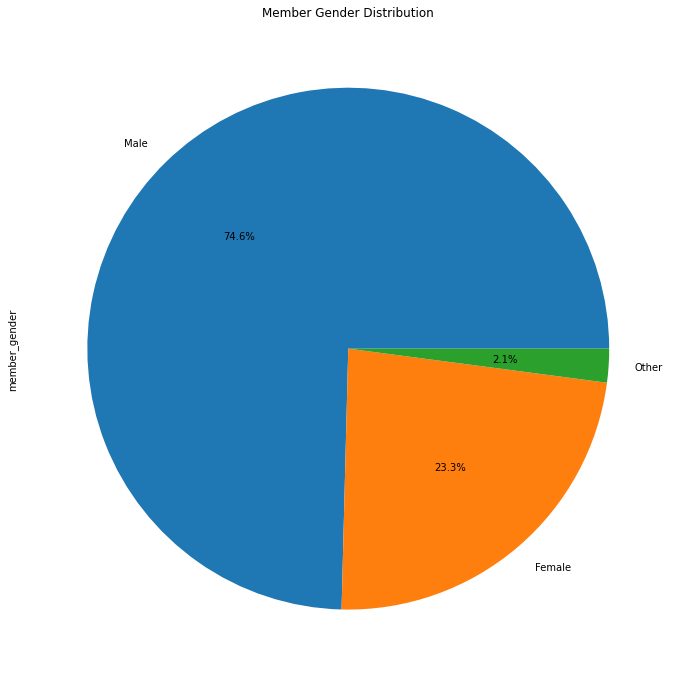

In [29]:
#this code plots a pie chart that shows the distribution of the member_gender
df['member_gender'].value_counts().plot(kind='pie', title="Member Gender Distribution", autopct='%1.1f%%', figsize = (20,12));

>**Observation:** From the above chart, we can see that 74.6% of the bikers were male, where 23.3% were female and the rest was neither male nor female. In other words, we can say each 100 of the biker, 74 of them were male, we only 23 were female.

#### 4. From the list of subscribers, how is their gender distribution?

In [30]:
#this extracts the number of subscribers, since we are going to plot the gender of the subscribers only
df_subscribers = df[df['user_type'] == 'Subscriber']

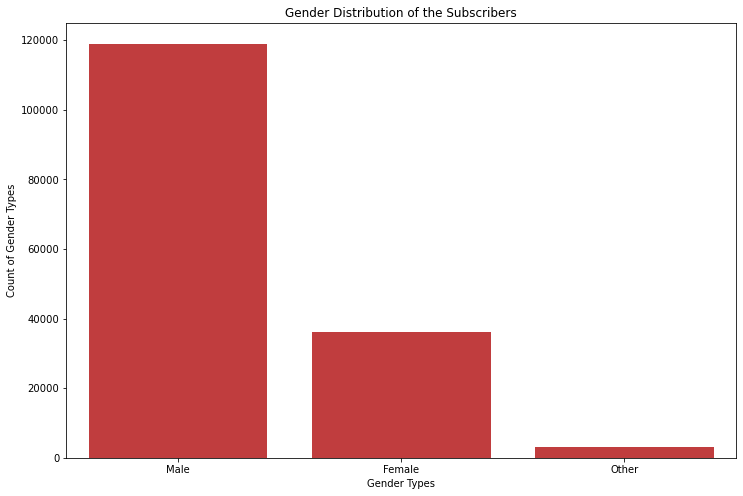

In [31]:
order = df_subscribers.member_gender.value_counts().index
seaborn_countplot(df_subscribers, df_subscribers.member_gender, "Gender Distribution of the Subscribers", "Gender Types", "Count of Gender Types")

>**Observation:** From the above bar chart, it clearly explores the gender composition of the subscribers. Male is the gender which dominates, where we have female is good number, and there also others.

#### 5. How many of the bikers took a round trip?

In [32]:
df['bike_share_for_all_trip'].value_counts()

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

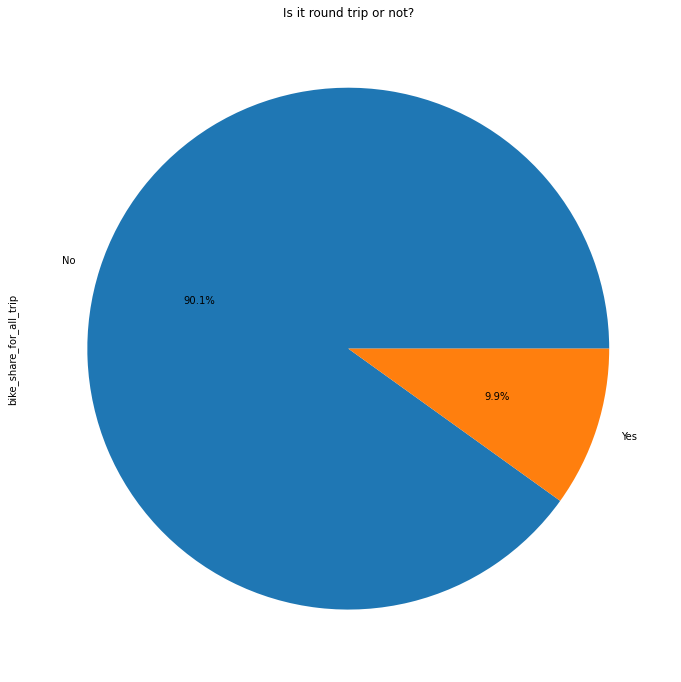

In [33]:
df['bike_share_for_all_trip'].value_counts().plot(kind='pie', title="Is it round trip or not?", autopct='%1.1f%%', figsize = (20,12));

>**Observation:** As we see in the chart, 90.1% of the trips has been one way, and only 9.9% has been a round trip. 

#### 6. Which are the start stations that are mostly used by the bikers?

In [34]:
#this function plots horizontal bar charts
def barhcharts(data, title: str, xlabel: str="", ylabel: str=""):
    plt.figure(figsize = [10, 8])
    data.plot(kind='barh')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [35]:
#since the start station are hundreds, I only choose the top ten end stations that are mostly used
df_start = df['start_station_name'].value_counts().head(10).sort_values()

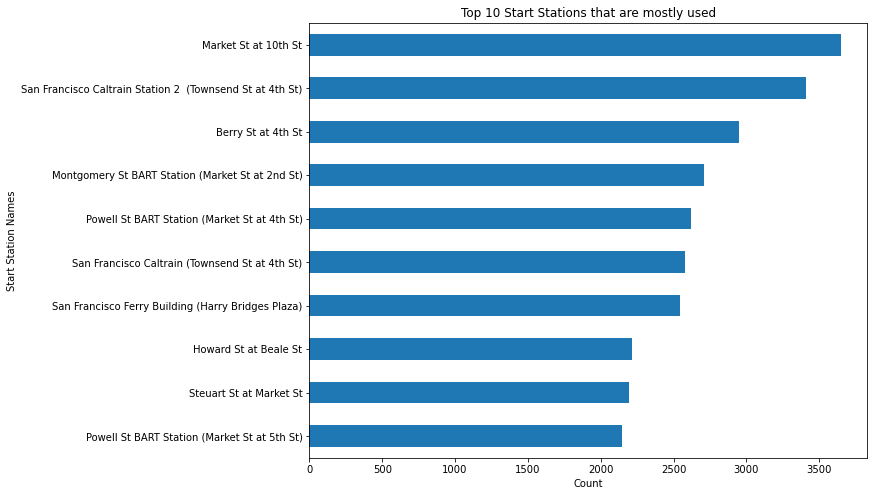

In [36]:
#this is the visualization of the top ten start station that are mostly used by the bikers
barhcharts(df_start,"Top 10 Start Stations that are mostly used",'Count','Start Station Names');

>**Observation:** From the above chart, we have the start stations that are mostly used by the riders. Market St is the most jammed start station.

#### 7. Which are the end station that are the most jammed? 

In [37]:
#since the end station are hundreds, I only choose the top ten end stations that are mostly used
df_end = df['end_station_name'].value_counts().head(10).sort_values()

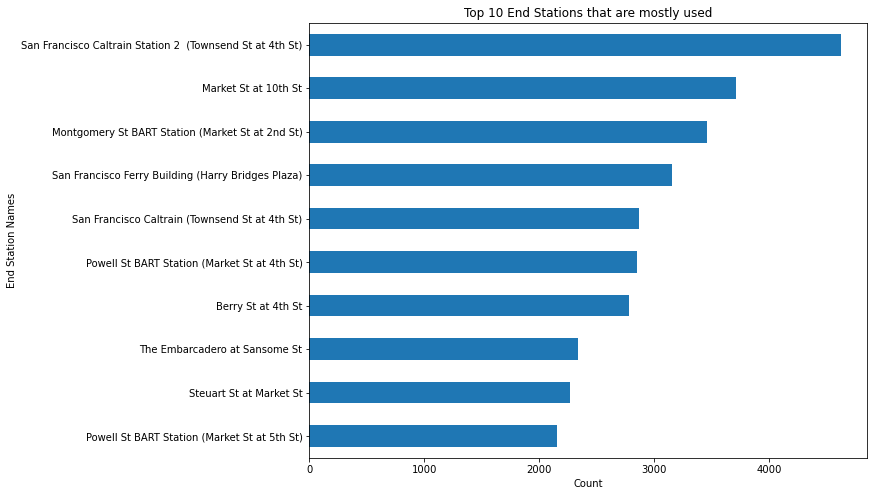

In [38]:
#this is the visualization of the top ten end station that are mostly used by the bikers
barhcharts(df_end,"Top 10 End Stations that are mostly used",'Count','End Station Names');

>**Observation:** From the above chart, we have the end stations that are mostly used by the riders. San Francisco Caltrain Station 2 is the most jammed end station.

#### 8. How is the biker's age distribution?

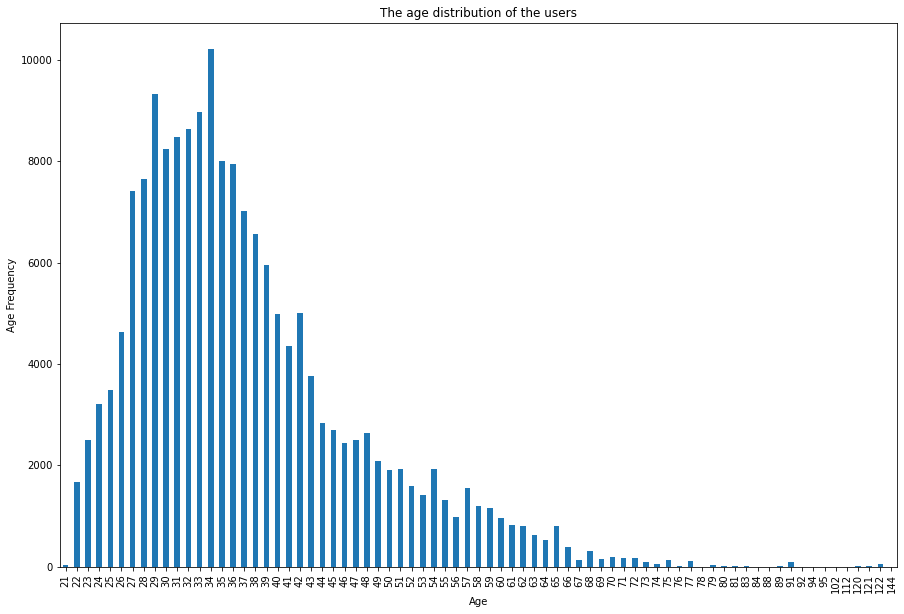

In [39]:
#so, since we have birth years, I did a subtraction in order to get the exact ages
(2022 - df['member_birth_year']).value_counts().sort_index().plot(kind='bar',figsize = [15, 10]);
plt.ylabel('Age Frequency')
plt.xlabel('Age');
plt.title('The age distribution of the users');

>**Observation:** From the above chart, we can easily explore that the distribution of biker's age is between 25 to almost 45. 34 old bikers have the highest distribution of the rides. 

#### 9. Which are the bikes that has been mostly used by bikers?

In [40]:
#let select the top ten bikes that are mostly used by the riders
df_bikeid = df['bike_id'].value_counts().head(10)

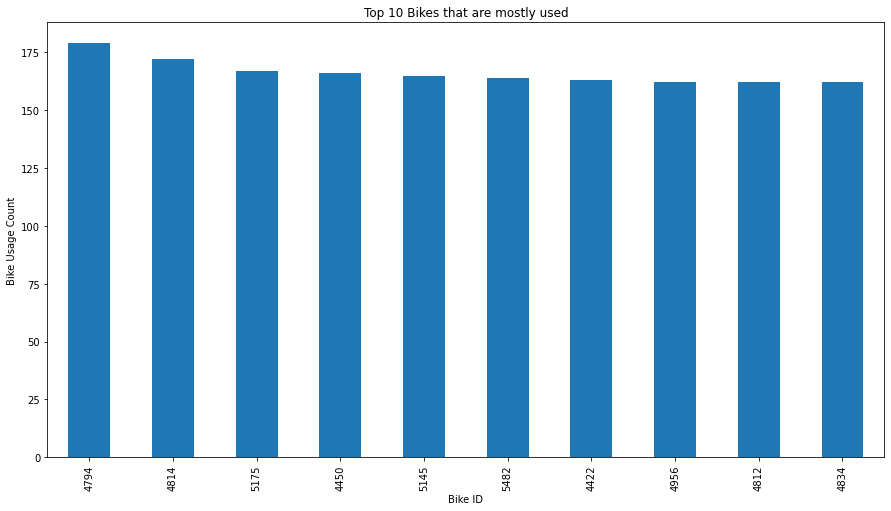

In [41]:
#this code visualizes a bar chart that contains the top ten bikes that are mostly used 
barcharts(df_bikeid, "Top 10 Bikes that are mostly used", "Bike ID", "Bike Usage Count")

>**Observation:** From the above chart, we can the top ten bikes that are mostly used by the bikers. A bake with an ID of 4794 is one which mostly used by the riders.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Descriptive statistics of the duration of the trips, user types and their frequency, the gender distribution, the age of the bikers and the types of the trips – one way trip or round trip, these are the main variables of interest. In the dataset, we have higher of males compared to females and other genders. Also, we have higher number of subscribers compared the number of customers that have been used the bikes. The age of the bikers is highly distributed around 25 up to 45. Moreover, the most of the trips were one-way trips. Lastly, I have applied a log transformation in the descriptive statistics of duration of the trips.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The age of the bikers was in some how to be replaced ages instead of using birth years, So, I have subtracted the column of birth years by this year in order to get the exact ages of the bikers. This was one the modification I have made when I was exploring the dataset.

## Bivariate Exploration

#### 1. How is the gender distribution on the bases of user type?

In [42]:
#this function plots seaborn's countplot by taking multiple arguments at one time
def seaborn_cluster_barchart(datadf, xaxis, the_hue, the_title: str, xlabel: str="", ylabel: str=""):
    plt.figure(figsize = [16, 10])
    color = sb.color_palette()[3]
    sb.countplot(data=datadf, x=xaxis, hue= the_hue)
    plt.title(the_title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

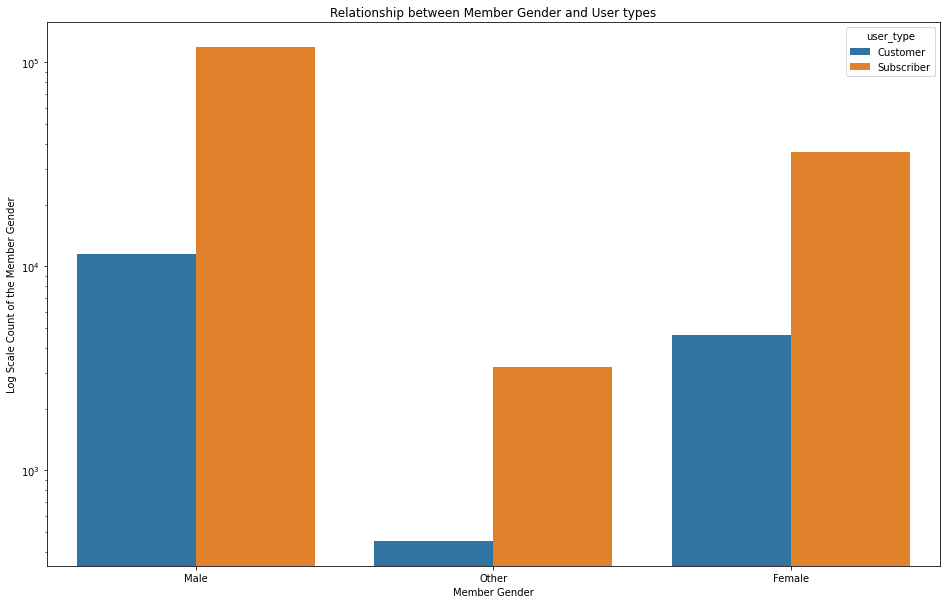

In [43]:
#here, we have explored the gender composition of user types
seaborn_cluster_barchart(df, df.member_gender, df.user_type, "Relationship between Member Gender and User types", "Member Gender", "Log Scale Count of the Member Gender")

#let us apply log distriubution function in order to get more clearer data
plt.yscale('log')

>**Observation:** From the above clustered bar chart, we have explored and visualized the member gender to  the frequency of user types. We can see that the males have the highest subscribers and customers, where the females are next the males and the other genders have the smallest number of subscriber/customer user types.

#### 2. User type composition on the basis of their age

In [44]:
#since age is in birth_year format, let us subtract 2022 in order to the exact ages
df['member_birth_year'] = 2022 - df['member_birth_year']

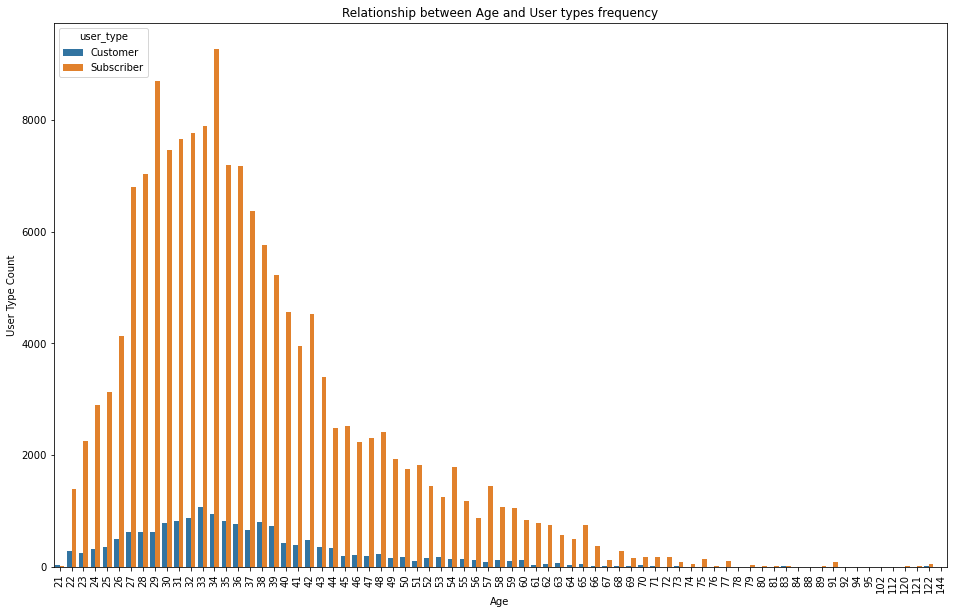

In [45]:
seaborn_cluster_barchart(df, df.member_birth_year, df.user_type, "Relationship between Age and User types frequency", "Age", "User Type Count")
plt.xticks(rotation=90);

>**Observation:** In this plot I have compared the frequency of user types and their corresponding ages. In terms of frequency, subscribers are always higher in number than the customers. But, one relation appears clearly in here, which is that the higher frequency of user types coincides when the age is between 25 up to 43. So, most of the user types either subscriber or customer, their age is in the 30s and 40s age. The youngest biker is 21 years old, that mean he was born in 2001,  and the eldest biker is 144 old.  

#### 3. User types according to round trips, are the customers usually take a round trips or subscriber take a round trips?

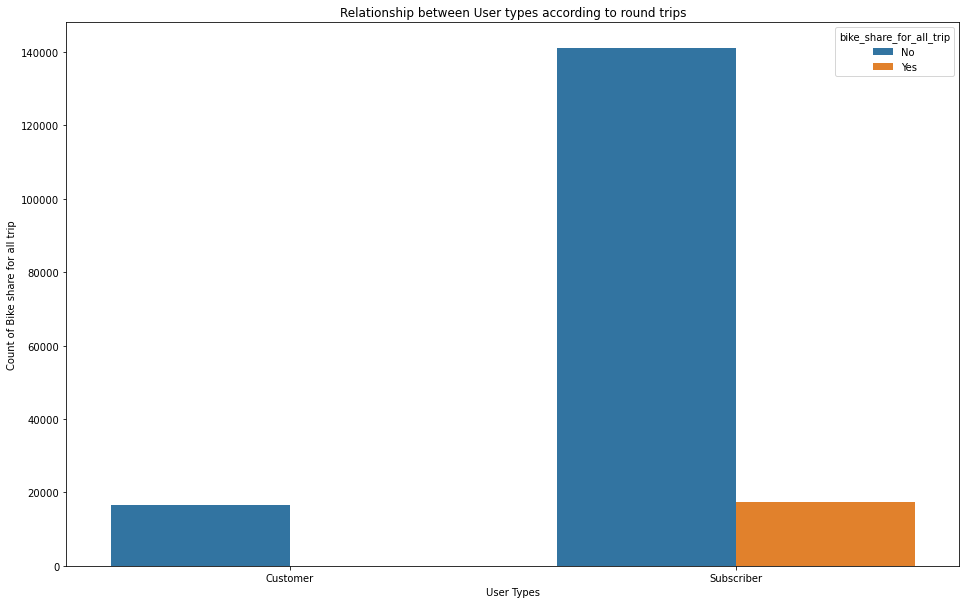

In [46]:
seaborn_cluster_barchart(df, df.user_type, df.bike_share_for_all_trip, "Relationship between User types according to round trips", "User Types", "Count of Bike share for all trip")

>**Observation:** According the clustered bar chart in the above figure, we noticed that there is no customers took a round trip, we can say all the customers took one way trips. On the other hand, most of the subscribers took a one way trip, where small number of the subscribers took a round trip.

#### 4. Age distribution over round trips

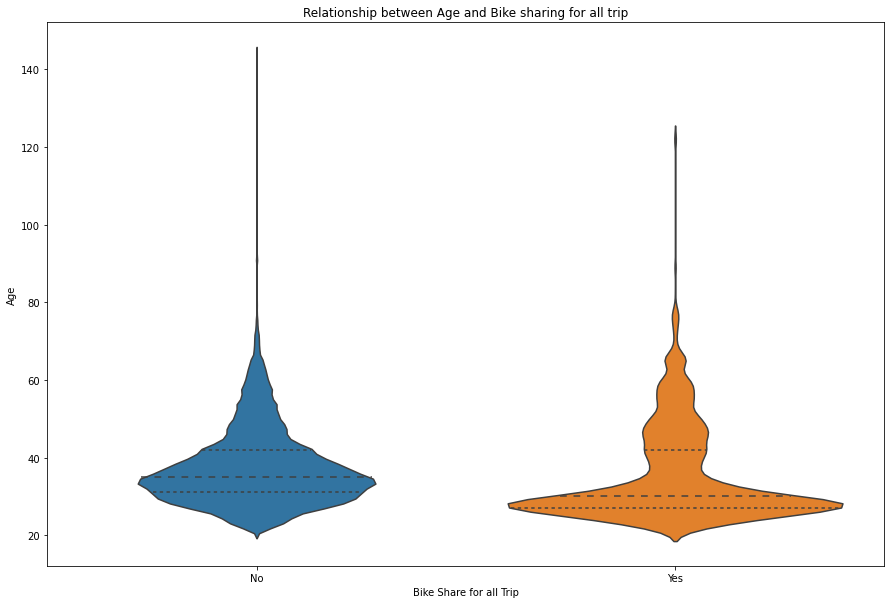

In [47]:
plt.figure(figsize = [15, 10])
sb.violinplot(data=df, x='bike_share_for_all_trip', y='member_birth_year',  inner="quartile");
plt.ylabel('Age')
plt.xlabel('Bike Share for all Trip');
plt.title('Relationship between Age and Bike sharing for all trip');

>**Observation:** From the above violin plot, it can be easily observed that the distribution of the one way trips is higher than the distribution of the rounf trips.

#### 5. The relationship between the age of the bikers and the duration of the trips

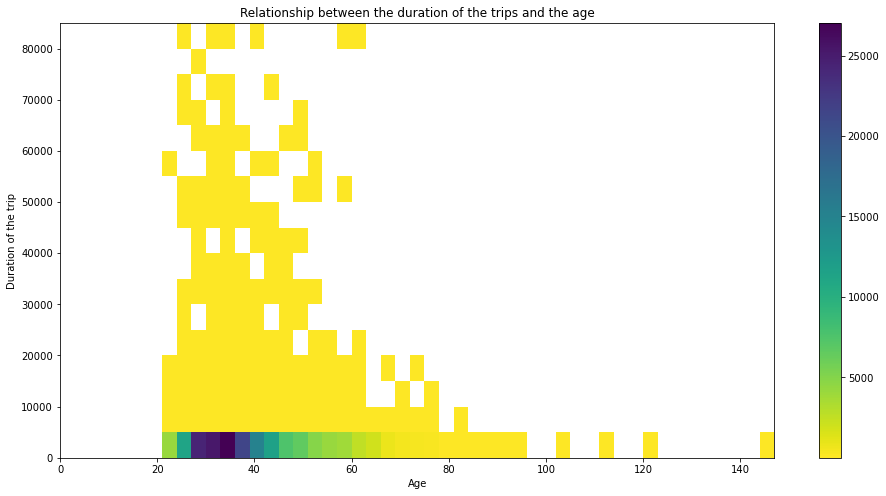

In [48]:
#in this plot, we gonna explore the relationship between the age of the bikers and the duration of the trips
plt.figure(figsize = [16, 8])
bins_x = np.arange(0, 145+5, 3);
bins_y = np.arange(0, 85000+5000, 5000);
plt.hist2d(data = df, x = 'member_birth_year', y = 'duration_sec', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y]);
plt.colorbar();
plt.ylabel('Duration of the trip')
plt.xlabel('Age');
plt.title('Relationship between the duration of the trips and the age');

>**Observation:** I observed here that age of the bikers vary with the duration of the trip. I have explored that the duration of the trip has high density when the age of the bikers is between 30 to 40, and that duration is less than 5000 seconds, which when we convert into hours equal to 1 hour and 23.3 minutes. There is an other scenario we can observe from the plot, long trips occur at the age of 20 to 50. This means most of the bikers are at this age interval.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In this section, I have compared the variables of interest. I have compared the age of the bikers and the frequency of the user types, and I have explored that in terms of frequency, subscribers are always higher in number than the customers. But the relation that exists is that the higher frequency of user types coincides when the age is between 25 up to 43. I have also explored the relationship between the gender types and the frequency of user types, and I have noticed that the males have the highest subscribers and customers, where the females are next the males and the other genders have the smallest number of subscriber/customer user types. The relationship between the age of the bikers and the duration of the trips is also plotted. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Main features of interest is observed, and there were no other interesting relations I have noticed.

## Multivariate Exploration



#### 1. The relationship between the age of the bikers, gender of the bikers and their user type

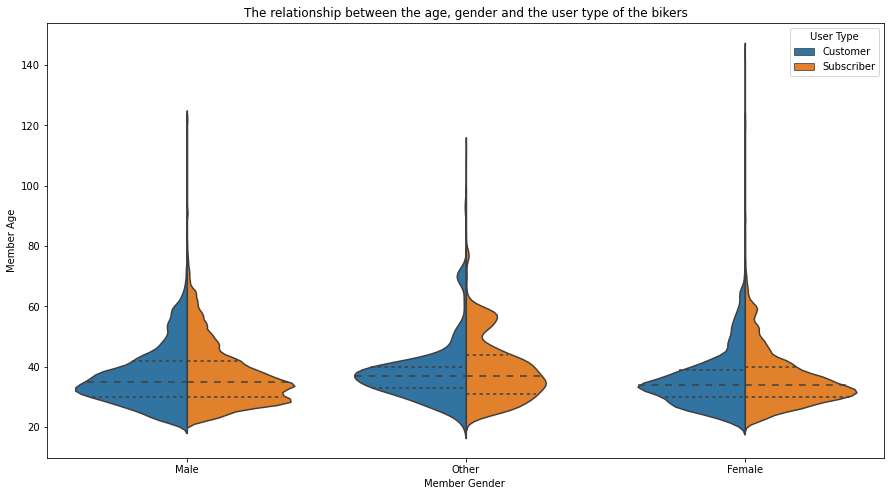

In [49]:
plt.figure(figsize = [15, 8])
sb.violinplot(data=df, x='member_gender', y='member_birth_year', hue="user_type", split=True,  inner="quartile")
plt.xlabel("Member Gender ")
plt.ylabel("Member Age")
plt.title('The relationship between the age, gender and the user type of the bikers');
plt.legend(title="User Type");

>**Observation:** In the above violin plot, I have compared the relationship between member gender, age of the member and user types. From the plot, it can be easily observed that the distribution of subscriber is always higher than the distribution of the customers. Moreover, the first and third inter quartiles user types varies when we have other gender related to their age. Also, the third  quartile of the user types varies in females on the basis of their age.  In males, the first and third quartiles of the user types are almost the same and their age is roughly between 35 and 43. In other gender type, the first and third quartiles of the customers have age values that are close to the median.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this section of multivariate exploration, I have compared the three variables of gender, age and the user types. So, I have observed the median, first and third inter quartiles in order to get the relationships between these variables. I have noticed that when we have subscribers – largest number of the users, the median coincides the ages between 36 to 40 approximately in all gender types. The median of user types in all different genders does not vary. 

### Were there any interesting or surprising interactions between features?

> One interesting thing is the distribution of the user types where the number of subscribers were very larger than the number of customer does not appear here.

## Conclusions
> After introducing what the ford bike sharing system is, I did a preliminary wrangling where I have visually and programmatically assessed the entire dataset. There have been some quality issues in the dataset, So, I have cleaned them, I have dropped all the null values for the sake of convenience analysis. Moreover, I have changed the data types of some columns. After the data wrangling process, I have started the exploratory data analysis by using question-visualization-observation framework.  I have explored single variable, bivariate and multivariate variables. In the dataset, we have higher of males compared to females and other genders. Also, we have higher number of subscribers compared the number of customers that have been used the bikes. The age of the bikers is highly distributed around 25 up to 45. Moreover, the most of the trips were one-way trips. In single variable exploration of data, I have compared the variables of interest. I have compared the age of the bikers and the frequency of the user types, and I have explored that in terms of frequency, subscribers are always higher in number than the customers. But the relation that exists is that the higher frequency of user types coincides when the age is between 25 up to 43. I have also explored the relationship between the gender types and the frequency of user types, and I have noticed that the males have the highest subscribers and customers, where the females are next the males and the other genders have the smallest number of subscriber/customer user types. The relationship between the age of the bikers and the duration of the trips is also plotted. In multivariate exploration of data, I have compared the three variables of gender, age and the user types. So, I have observed the median, first and third inter quartiles in order to get the relationships between these variables. I have noticed that when we have subscribers – largest number of the users, the median coincides the ages between 36 to 40 approximately in all gender types. The median of user types in all different genders does not vary. 
